In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
from pydataset import data

import warnings
warnings.filterwarnings('ignore')


In [2]:
import wrangle

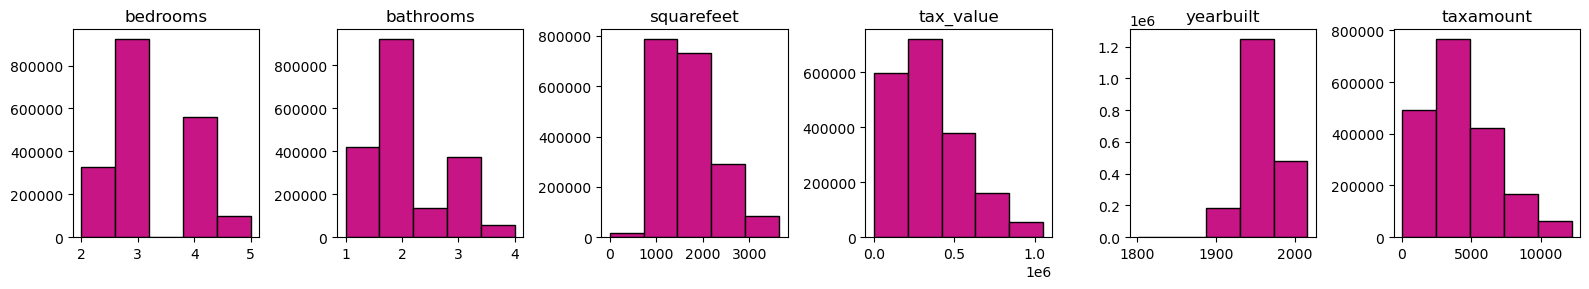

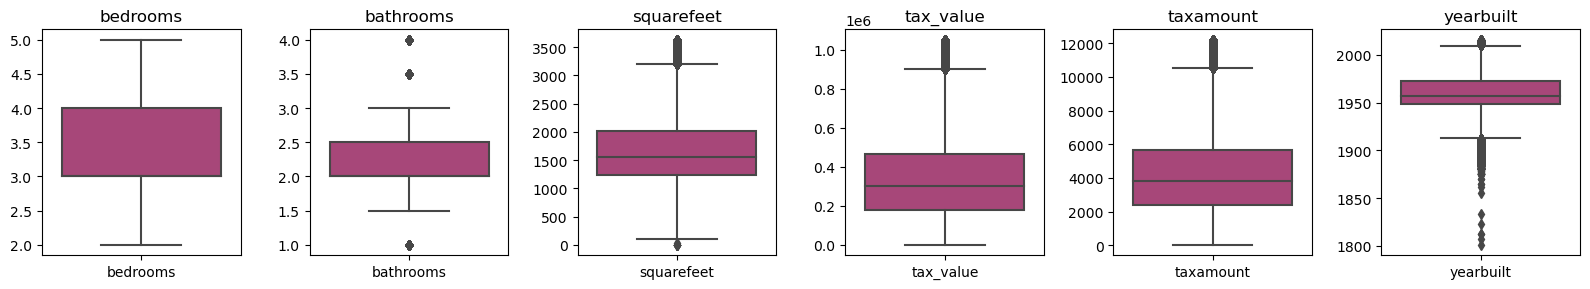

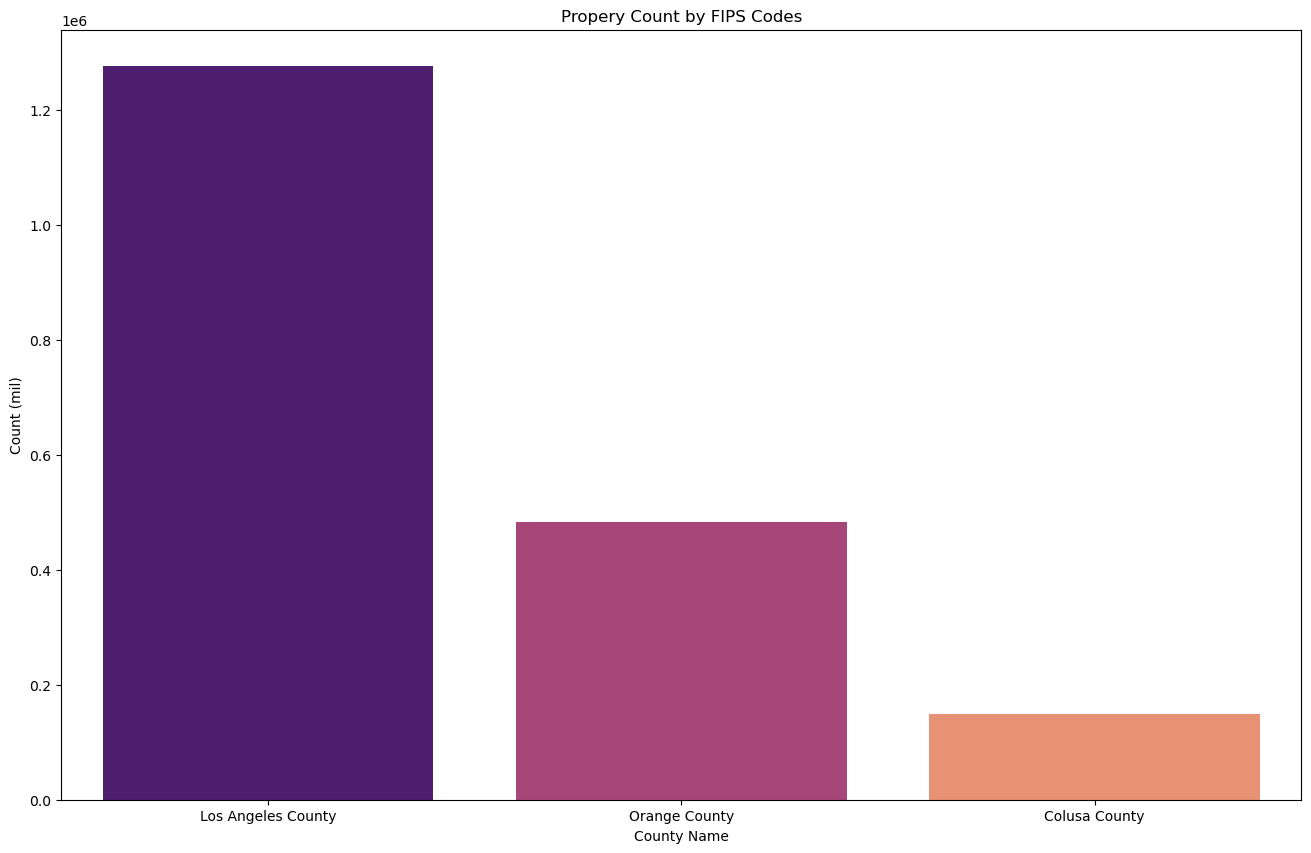

In [3]:
train, val, test = wrangle.wrangle_zillow()

In [4]:
train.columns

Index(['bedrooms', 'bathrooms', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount', 'fips', 'propertytypeid', 'fips_location'],
      dtype='object')

In [5]:
X = train.drop(columns={'fips', 'propertytypeid', 'fips_location', 'tax_value'})
y = train['tax_value']

In [6]:
X.columns

Index(['bedrooms', 'bathrooms', 'squarefeet', 'yearbuilt', 'taxamount'], dtype='object')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

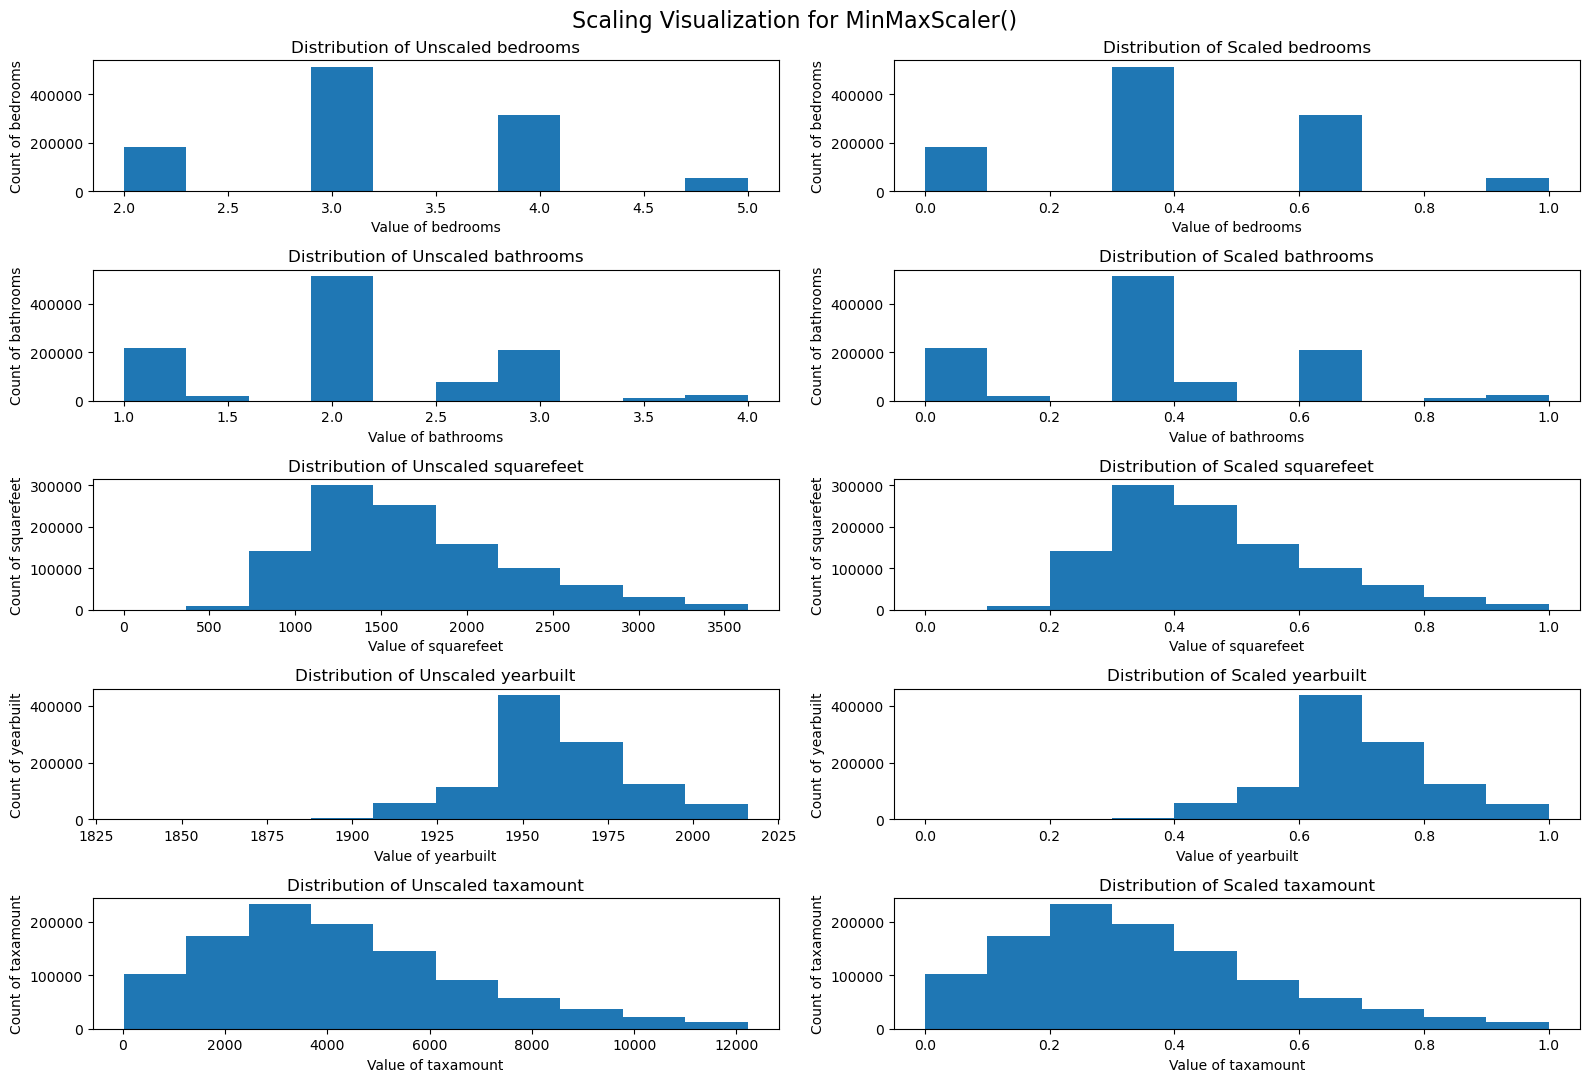

In [8]:
wrangle.scale_and_vis(scaler, X, ['bedrooms', 'bathrooms', 'squarefeet', 'yearbuilt', 'taxamount'])

In [9]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, val, test)
train_scaled.head()
X_scaled = train_scaled.drop(columns={'fips', 'propertytypeid', 'fips_location', 'tax_value'})
y = train['tax_value']

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression().fit(X_scaled[['squarefeet']], y)

In [12]:
y_preds = lm.predict(X_scaled[['squarefeet']])

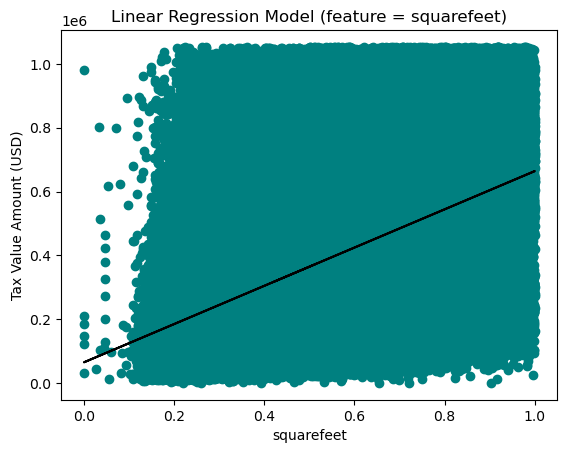

In [13]:
plt.scatter(X_scaled[['squarefeet']], y, color='teal')

plt.plot(X_scaled[['squarefeet']], y_preds, color='black')
plt.title('Linear Regression Model (feature = squarefeet)')
plt.xlabel('squarefeet')
plt.ylabel('Tax Value Amount (USD)')
plt.show()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [14]:
baseline = y.mean()
baseline

341792.9642645853

In [15]:
X_scaled['baseline'] = baseline

In [16]:
X_scaled.head()

,bedrooms,bathrooms,squarefeet,yearbuilt,taxamount,baseline
1162651,0.333333,0.333333,0.422675,0.956284,0.278072,341792.964265
782265,0.333333,0.666667,0.489543,0.683060,0.524315,341792.964265
405503,0.666667,0.333333,0.505779,0.808743,0.373538,341792.964265
1028626,0.666667,0.333333,0.482939,0.639344,0.549453,341792.964265
1802146,0.333333,0.333333,0.333242,0.683060,0.294512,341792.964265


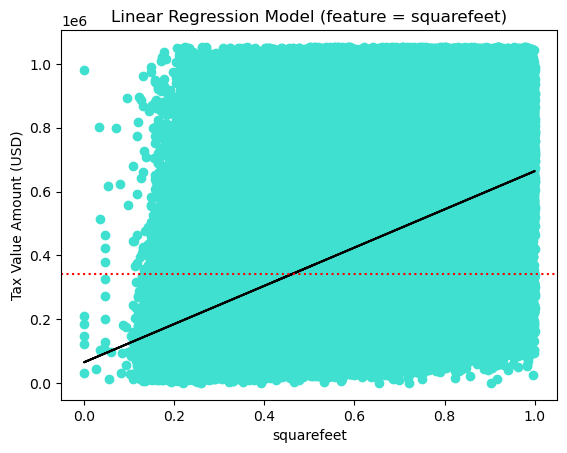

In [17]:
plt.scatter(X_scaled[['squarefeet']], y, color='turquoise')

plt.plot(X_scaled[['squarefeet']], y_preds, color='black')
plt.title('Linear Regression Model (feature = squarefeet)')
plt.xlabel('squarefeet')
plt.ylabel('Tax Value Amount (USD)')
plt.axhline(baseline, ls=':', color='red')
plt.show()

In [18]:
X_scaled['yhat'] = y_preds
X_scaled

,bedrooms,bathrooms,squarefeet,yearbuilt,taxamount,baseline,yhat
1162651,0.333333,0.333333,0.422675,0.956284,0.278072,341792.964265,318033.138999
782265,0.333333,0.666667,0.489543,0.683060,0.524315,341792.964265,358126.188084
405503,0.666667,0.333333,0.505779,0.808743,0.373538,341792.964265,367860.714405
1028626,0.666667,0.333333,0.482939,0.639344,0.549453,341792.964265,354166.380767
1802146,0.333333,0.333333,0.333242,0.683060,0.294512,341792.964265,264410.748248
...,...,...,...,...,...,...,...
121192,0.666667,0.333333,0.364337,0.628415,0.300955,341792.964265,283054.841032
1625371,0.666667,0.500000,0.665382,0.912568,0.834283,341792.964265,463556.057900
952015,0.333333,0.333333,0.462576,0.721311,0.731771,341792.964265,341956.974873
1726184,0.666667,0.666667,0.313429,0.677596,0.251994,341792.964265,252531.326297


Calculate the residuals for both baseline (actual mean) and yhat (prediction).

In [19]:
X_scaled['baseline_residual'] = y - X_scaled.baseline
X_scaled['lm_residual'] = y - X_scaled.yhat

### SSE (Sum of Squared Errors)

Compute the SSE, Sum of Squared Errors, a.k.a. RSS, Residual Sum of Squares. This is simply squaring each of the errors computed in step one and summing them all together.

In [20]:
from sklearn.metrics import mean_squared_error


SSE_lm = mean_squared_error(y, X_scaled.yhat)*len(train)
SSE_lm

3.9445182871540136e+16

### ESS (Explained Sum of Squares)

In [21]:
ESS_lm = ((X_scaled.yhat - y.mean()) ** 2).sum()
ESS_lm

1.0222775859159238e+16

### TSS (Total Sum of Squares)

In [22]:
TSS_lm = ESS_lm + SSE_lm
TSS_lm

4.966795873069938e+16

### MSE (Mean Squared Error)

In [23]:
MSE_lm = mean_squared_error(y, X_scaled.yhat)
MSE_lm

# USD (original unit of measurement)

36924426147.31522

### RMSE (Root Mean Squared Error)

In [24]:
RMSE_lm = sqrt(MSE_lm)
RMSE_lm
# USD (original unit of measurement)

192157.2953268109

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [25]:
SSE_baseline = mean_squared_error(y, X_scaled.baseline)*len(train)
SSE_baseline

4.966795873070233e+16

In [26]:
MSE_baseline = mean_squared_error(y, X_scaled.baseline)
MSE_baseline

46493912324.15679

In [27]:
RMSE_baseline = sqrt(MSE_baseline)
RMSE_baseline

215624.4706060905

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [28]:
def compare_SSE(SSE_baseline, SSE_model):
    if SSE_baseline > SSE_model:
        print(f'The SSE for the baseline is {SSE_baseline}. The SSE for the model is {SSE_model}. \n\nThe SSE for the baseline is greater than that of the model. \n\nThe model seems to perform better than the baseline.')
    if SSE_baseline < SSE_model:
        print(f'The SSE for the baseline is {SSE_baseline}. The SSE for the model is {SSE_model}. \n\nThe SSE for the baseline is less than that of the model. \n\nThe baseline model seems to perform better than the linear regression model.')

In [29]:
compare_SSE(SSE_baseline, SSE_lm)

The SSE for the baseline is 4.966795873070233e+16. The SSE for the model is 3.9445182871540136e+16. 

The SSE for the baseline is greater than that of the model. 

The model seems to perform better than the baseline.


7. What is the amount of variance explained in your model?

In [30]:
evs = explained_variance_score(y, X_scaled.yhat)
print(f'The explained variance is {evs}.')

The explained variance is 0.20582234745320738.


In [31]:
r2_score(y, X_scaled.yhat)

0.2058223474532076

8. Is your model better than the baseline model?

In [32]:
eval_df = pd.DataFrame(
    {
    'Model': [SSE_lm, MSE_lm, RMSE_lm],
    'Baseline': [SSE_baseline, MSE_baseline, RMSE_baseline],   
    }, index = ['SSE', 'MSE', 'RMSE']
)

eval_df

,Model,Baseline
SSE,3.944518e+16,4.966796e+16
MSE,3.692443e+10,4.649391e+10
RMSE,1.921573e+05,2.156245e+05


9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot

In [33]:

def plot_residuals(y, yhat):

# plt.scatter(X['baseline'], X['baseline_residual'], color='turquoise')

# plt.title('Baseline Model Residual')
# plt.xlabel('squarefeet')
# plt.ylabel('Residual')
# plt.axhline(baseline, ls=':', color='red')
# plt.show()

    plt.scatter(yhat, (y - yhat), color='purple')

    plt.title('Linear Regression Model Residual')
    plt.xlabel('Predictions')
    plt.ylabel('Residual')
    plt.show()

In [34]:
X.head()

,bedrooms,bathrooms,squarefeet,yearbuilt,taxamount
1162651,3.0,2.0,1537.0,2008.0,3410.01
782265,3.0,3.0,1780.0,1958.0,6415.11
405503,4.0,2.0,1839.0,1981.0,4575.06
1028626,4.0,2.0,1756.0,1950.0,6721.89
1802146,3.0,2.0,1212.0,1958.0,3610.64


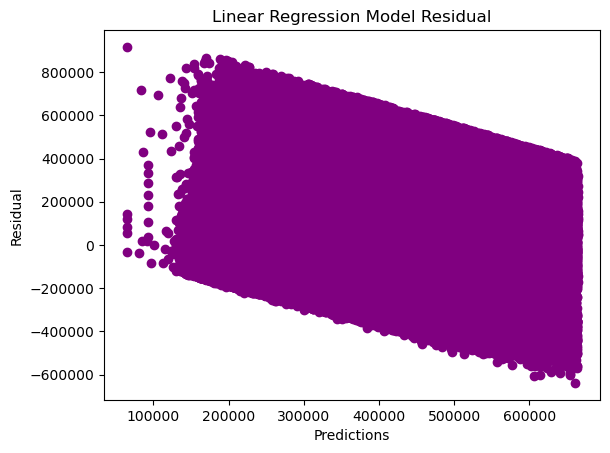

In [35]:
plot_residuals(y, X_scaled.yhat)

- regression_errors(y, yhat): returns the following values:


    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)

In [36]:
def regression_errors(y, yhat):

    SSE = mean_squared_error(y, yhat)*len(y)
    ESS = sum((yhat - y.mean()) ** 2)
    TSS = SSE + ESS
    MSE = mean_squared_error(y, yhat)
    RMSE = sqrt(MSE)

    regression_errors_df = pd.DataFrame(
    {
        'model_metrics': [SSE, ESS, TSS, MSE, RMSE]
        }, index = ['SSE', 'ESS', 'TSS', 'MSE', 'RMSE']
    )
    
    return regression_errors_df

In [37]:
regression_errors(y, X_scaled['yhat'])

,model_metrics
SSE,3.944518e+16
ESS,1.022278e+16
TSS,4.966796e+16
MSE,3.692443e+10
RMSE,1.921573e+05


- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [38]:
def baseline_mean_errors(y):
    baseline = [[y.mean()]] * len(y)
    
    SSE_baseline = mean_squared_error(y, baseline)*len(y)
    MSE_baseline = mean_squared_error(y, baseline)
    RMSE_baseline = sqrt(MSE_baseline)
    
    baseline_errors_df = pd.DataFrame(
    {
        'baseline_metrics': [SSE_baseline, MSE_baseline, RMSE_baseline]
        }, index = ['SSE', 'MSE', 'RMSE']
    )
    
    return baseline_errors_df

In [39]:
baseline_mean_errors(y)

,baseline_metrics
SSE,4.966796e+16
MSE,4.649391e+10
RMSE,2.156245e+05


- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [40]:
def better_than_baseline(y, yhat):  
    
    SSE = mean_squared_error(y, yhat)*len(y)
    MSE = mean_squared_error(y, yhat)
    RMSE = sqrt(MSE)
    
    baseline = [[y.mean()]] * len(y)
    
    SSE_baseline = mean_squared_error(y, baseline)*len(y)
    MSE_baseline = mean_squared_error(y, baseline)
    RMSE_baseline = sqrt(MSE_baseline)
    
    model_comparison_df = pd.DataFrame(
        {
        'baseline_metrics': [SSE_baseline, MSE_baseline, RMSE_baseline],
        'model_metrics': [SSE, MSE, RMSE]
        }, index = ['SSE', 'MSE', 'RMSE']
    )
    
    if SSE < SSE_baseline:
        print(f'The model SSE is less than the baseline SSE. This indicates that the model performs better than the baseline.\n\n')
    else:
        print(f'The baseline SSE is less than or equal to the model SSE. This indicates that the baseline performs better than the model.\n\n')
        
    if MSE < MSE_baseline:
        print(f'The model MSE is less than the baseline MSE. This indicates that the model performs better than the baseline.\n\n')
    else:
        print(f'The baseline MSE is less than or equal to the model MSE. This indicates that the baseline performs better than the model.\n\n')
        
    if RMSE < RMSE_baseline:
        print(f'The model RMSE is less than the baseline RMSE. This indicates that the model performs better than the baseline.\n\n')
    else:
        print(f'The baseline RMSE is less than or equal to the model RMSE. This indicates that the baseline performs better than the model.\n\n')
        
    print(f'\nIs the model better than the baseline?\n')
    if SSE < SSE_baseline and MSE < MSE_baseline and RMSE < RMSE_baseline:
        print('True')
    else:
        print('False')
    
    return model_comparison_df

In [41]:
better_than_baseline(y, X_scaled['yhat'])

The model SSE is less than the baseline SSE. This indicates that the model performs better than the baseline.


The model MSE is less than the baseline MSE. This indicates that the model performs better than the baseline.


The model RMSE is less than the baseline RMSE. This indicates that the model performs better than the baseline.



Is the model better than the baseline?

True


,baseline_metrics,model_metrics
SSE,4.966796e+16,3.944518e+16
MSE,4.649391e+10,3.692443e+10
RMSE,2.156245e+05,1.921573e+05


# Bonus Exercises

In [42]:
tips = data('tips')

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_validate, test = train_test_split(tips, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)


In [46]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
19,16.97,3.50,Female,No,Sun,Dinner,3
173,7.25,5.15,Male,Yes,Sun,Dinner,2
119,12.43,1.80,Female,No,Thur,Lunch,2
29,21.70,4.30,Male,No,Sat,Dinner,2
238,32.83,1.17,Male,Yes,Sat,Dinner,2


In [47]:
train_X = train.drop(columns='tip')
train_y = train['tip']

In [48]:
lm = LinearRegression().fit(train_X[['total_bill']], train_y)
yhat = lm.predict(train_X[['total_bill']])
yhat

array([2.741254  , 1.64282391, 2.22820126, 3.27577811, 4.53354838,
       5.20029093, 3.44189872, 3.11643795, 2.79662754, 3.25317667,
       2.18299838, 2.18186831, 2.94579706, 2.84522064, 2.79775761,
       4.73696136, 4.8081559 , 2.88477316, 2.24741249, 2.01122742,
       3.54473528, 1.7931235 , 5.2782659 , 3.40234619, 2.10615347,
       1.96150424, 2.16491722, 4.25894085, 2.83278984, 2.08581218,
       1.91743143, 3.06219448, 3.8803667 , 2.83731013, 2.66779932,
       3.59445845, 4.03744672, 3.19780314, 2.77402609, 1.90839085,
       2.45986605, 2.23385162, 2.84861085, 2.52541023, 3.1345191 ,
       2.51975987, 4.20582747, 1.96376439, 2.33442804, 1.78521299,
       4.48495528, 4.00693477, 2.56157254, 2.19768932, 3.0576742 ,
       3.39443569, 2.48811785, 6.28516016, 2.13553535, 1.90274049,
       1.98410569, 2.42257367, 2.92997605, 2.93562641, 2.60564535,
       1.69819744, 2.62937686, 5.11892573, 5.40596405, 2.89042352,
       2.59660477, 2.2632335 , 3.71198595, 3.39556576, 3.32324

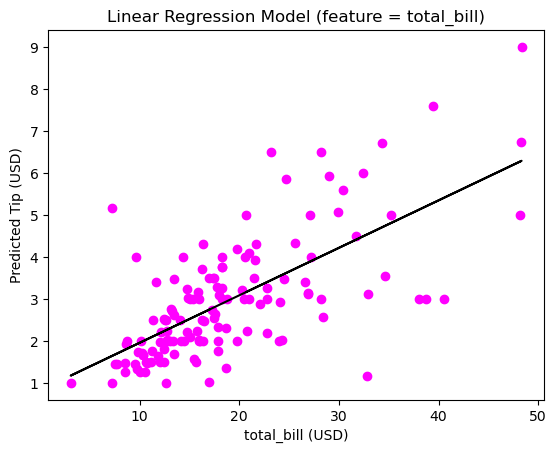

In [49]:
plt.scatter(train_X[['total_bill']], train_y, color='magenta')

plt.plot(train_X[['total_bill']], yhat, color='black')
plt.title('Linear Regression Model (feature = total_bill)')
plt.xlabel('total_bill (USD)')
plt.ylabel('Predicted Tip (USD)')
plt.show()

In [50]:
train_X[['total_bill']]

,total_bill
19,16.97
173,7.25
119,12.43
29,21.70
238,32.83
208,38.73
184,23.17
61,20.29
42,17.46
161,21.50


In [51]:
from evaluate import plot_residuals, regression_errors, baseline_mean_errors, better_than_baseline

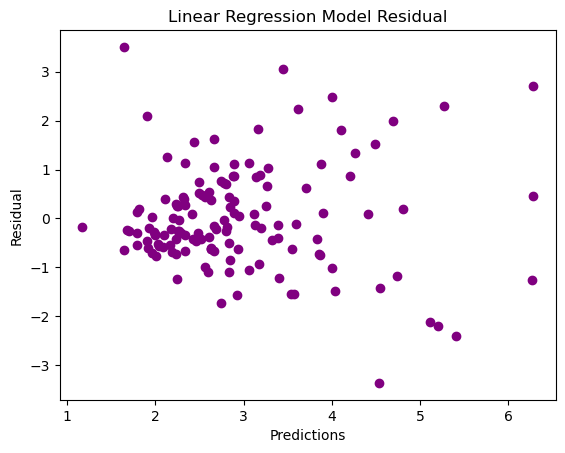

In [52]:
plot_residuals(train_y, yhat)

In [53]:
train_y.shape

(136,)

In [54]:
yhat.shape

(136,)

In [55]:
regression_errors(train_y, yhat)

,model_metrics
SSE,153.536640
ESS,132.895024
TSS,286.431664
MSE,1.128946
RMSE,1.062519


In [56]:
baseline_mean_errors(train_y)

,baseline_metrics
SSE,286.431664
MSE,2.106115
RMSE,1.451246


In [57]:
better_than_baseline(train_y, yhat)

The model SSE is less than the baseline SSE. This indicates that the model performs better than the baseline.


The model MSE is less than the baseline MSE. This indicates that the model performs better than the baseline.


The model RMSE is less than the baseline RMSE. This indicates that the model performs better than the baseline.



Is the model better than the baseline?

True


,baseline_metrics,model_metrics
SSE,286.431664,153.536640
MSE,2.106115,1.128946
RMSE,1.451246,1.062519


In [58]:
mpg = data('mpg')

In [59]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [60]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [61]:
mpg = mpg.drop(columns={'manufacturer', 'model', 'trans', 'drv', 'fl', 'class'})

In [62]:
train_validate, test = train_test_split(mpg, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [63]:
train_X = train.drop(columns='hwy')
train_y = train['hwy']
train_y

229    29
56     17
145    32
222    44
232    26
42     24
212    24
103    29
155    26
136    16
74     15
8      26
143    27
193    27
79     19
116    26
153    20
146    27
11     27
26     26
201    20
139    19
198    35
94     24
77     18
64     15
226    28
137    18
3      31
30     14
47     23
31     15
99     20
9      25
96     22
148    26
107    36
169    26
175    20
70     12
39     24
55     12
161    24
106    36
104    32
19     20
208    29
221    24
65     16
122    24
142    29
197    37
1      29
27     25
111    30
33     27
88     17
16     24
14     25
40     22
15     25
37     26
108    29
178    20
200    18
205    19
180    29
154    18
66     12
196    35
89     15
216    29
4      30
189    31
59     17
171    27
225    26
130    14
110    27
160    25
131    15
90     17
35     26
191    26
150    25
167    26
46     21
84     17
76     17
128    19
211    29
144    31
135    17
230    28
87     16
10     28
187    27
140    19
118    28
132    18


In [64]:
lm = LinearRegression().fit(train_X[['displ']], train_y)
yhat = lm.predict(train_X[['displ']])
yhat

array([29.60167395, 17.07609309, 27.02287789, 29.23327452, 25.91767958,
       24.0756824 , 25.91767958, 30.33847283, 24.81248127, 16.33929422,
       14.49729703, 29.60167395, 27.39127733, 24.0756824 , 21.49688634,
       28.86487508, 21.49688634, 23.33888352, 28.86487508, 13.39209872,
       26.28607902, 21.49688634, 29.60167395, 21.49688634, 16.33929422,
       14.49729703, 27.02287789, 16.33929422, 28.86487508, 16.70769366,
       22.23368521, 15.23409591, 16.33929422, 29.60167395, 19.28648971,
       25.18088071, 29.60167395, 27.02287789, 26.28607902, 18.91809028,
       25.18088071, 18.91809028, 27.02287789, 29.60167395, 30.33847283,
       16.70769366, 28.86487508, 25.91767958, 18.91809028, 26.28607902,
       27.39127733, 29.60167395, 29.60167395, 13.39209872, 27.39127733,
       27.39127733, 19.28648971, 25.91767958, 24.81248127, 24.0756824 ,
       24.81248127, 22.97048409, 28.86487508, 21.49688634, 15.23409591,
       23.70728296, 28.12807621, 15.60249534, 18.91809028, 29.60

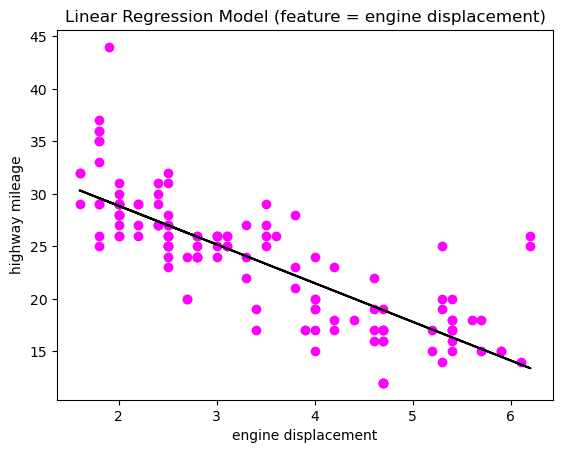

In [65]:
plt.scatter(train_X[['displ']], train_y, color='magenta')

plt.plot(train_X[['displ']], yhat, color='black')
plt.title('Linear Regression Model (feature = engine displacement)')
plt.xlabel('engine displacement')
plt.ylabel('highway mileage')
plt.show()

In [66]:
from evaluate import plot_model_preds

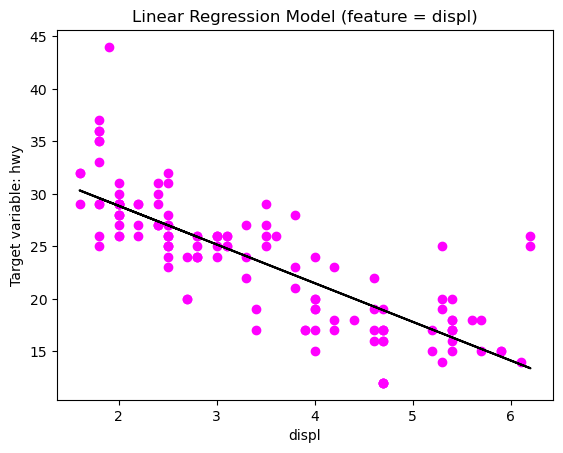

In [67]:
plot_model_preds(train_X, 'displ', train_y, yhat, 'hwy')

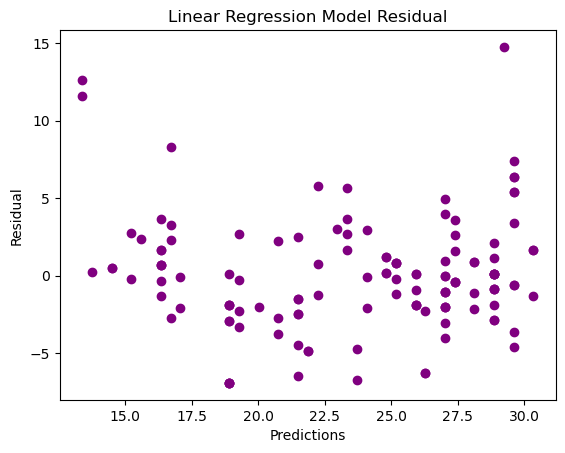

In [68]:
plot_residuals(train_y, yhat)

In [69]:
regression_errors(train_y, yhat)

,model_metrics
SSE,1722.759014
ESS,3027.517909
TSS,4750.276923
MSE,13.251992
RMSE,3.640329


In [70]:
baseline_mean_errors(train_y)

,baseline_metrics
SSE,4750.276923
MSE,36.540592
RMSE,6.044881


In [71]:
better_than_baseline(train_y, yhat)

The model SSE is less than the baseline SSE. This indicates that the model performs better than the baseline.


The model MSE is less than the baseline MSE. This indicates that the model performs better than the baseline.


The model RMSE is less than the baseline RMSE. This indicates that the model performs better than the baseline.



Is the model better than the baseline?

True


,baseline_metrics,model_metrics
SSE,4750.276923,1722.759014
MSE,36.540592,13.251992
RMSE,6.044881,3.640329
